# Onset Time Analyses

Here, we explore the relationship between manually and automatically generated speech onset latencies. We first define a function which returns the longest matching, ordered set of strings shared between two lists (ignoring non-matching items). We use this function to match words that were transcribed the same way by manual transcribers and automatic transcription, and to then find the corresponding onset time pairs (manual and automatic) for these words.

Then, we generate the absolute mean difference between all onset time pairs (0.4466), as well as the subject-wise absolute mean difference (0.4545), providing boxplots and summary statistics.

Finally, we provide analyses of the correlations between manual and automatic onset times and related plots, as provided in our publication, "Is automatic speech-to-text transcription ready for use in psychological experiments?"

# Import Statements

In [163]:
import quail
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
from scipy.stats import pearsonr
import numpy as np

%matplotlib inline
sns.set_context("notebook", font_scale=1.5)

# Import Data

In [164]:
# load transcribed text
auto_words = quail.load_egg('../data/auto_egg.egg')
man_words = quail.load_egg('../data/man_egg.egg')

In [165]:
# load onset times
with open('automatic_onsets_NEWEST.p', 'rb') as file:
    auto_onsets = pickle.load(file)
    
with open('man_onsets_NEWEST.p', 'rb') as file:
    man_onsets = pickle.load(file)
    

# Define Function for Finding Matched Recalls

In [166]:
def get_matching_inds(x, y):
    def match_matrix(x, y):
        m = np.zeros([len(x) + 1, len(y) + 1])
        for i in np.arange(len(x)):
            for j in np.arange(len(y)):
                if x[i] == y[j]:
                    m[i+1, j+1] = m[i, j] + 1
                else:
                    m[i+1, j+1] = np.max([m[i, j+1], m[i+1, j]])
        return m
    
    def backtrack(m, x, y):
        i = len(x)
        j = len(y)
        
        longest_common_sequence = list()
        x_inds = list()
        y_inds = list()
        
        while (i >= 1) and (j >= 1):
            if m[i, j] == m[i, j-1]:
                j -= 1
            elif m[i, j] == m[i-1, j]:
                i -= 1                
            else:
                i -= 1
                j -= 1
                longest_common_sequence.insert(0, x[i])
                x_inds.insert(0, i)
                y_inds.insert(0, j)
        return longest_common_sequence, x_inds, y_inds
    
    return backtrack(match_matrix(x, y), x, y)

# Onset Data

## Replace Nones with Nans

In [167]:
from numpy import nan
man_words.rec.fillna(value=nan, inplace=True)
auto_words.rec.fillna(value=nan, inplace=True)
man_onsets.fillna(value=nan, inplace=True)
auto_onsets.fillna(value=nan, inplace=True)

# Obtain Onsets for Matched Transcriptions

In [168]:
shifted_y = []
for add_on in [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]:
    x_onsets = []
    y_onsets = []
    list_corrs = []
    sub_corrs = []
    sub_onsets_man = []
    sub_onsets_auto = []

    for sub in range(30):

        # subject-wise variables
        sub_lists_man = []
        sub_lists_auto = []

        for lst in range(8):

            # get man and auto words for this list
            man = list(man_words.rec.loc[sub].iloc[lst])
            auto = list(auto_words.rec.loc[sub].iloc[lst])

            # get the string and indices
            data = get_matching_inds(man, auto)

            # assign man and auto indices
            mo_ind = data[1]
            ao_ind = data[2]

            # generate list-wise correlations
            mo_list = [float(list(man_onsets.loc[sub].iloc[lst])[mo]) for mo in mo_ind]
            ao_list = [float(list(auto_onsets.loc[sub].iloc[lst])[ao]) for ao in ao_ind]
            list_corrs.append(pearsonr(mo_list, ao_list))


            # pull corr values out of tuple
            list_corrs_only = [x[0] for x in list_corrs]

            # generat subject-wise correlations
            sub_lists_man.append(mo_list)
            sub_lists_auto.append(ao_list)


            # get individual onset vals for all words, all subs, all lists 
            for mo,ao in zip(mo_ind, ao_ind):

                x_onsets.append(float(list(man_onsets.loc[sub].iloc[lst])[mo])*.001)
                y_onsets.append(float(list(auto_onsets.loc[sub].iloc[lst])[ao])+add_on)

        sub_onsets_man.append(sub_lists_man) 
        sub_onsets_auto.append(sub_lists_auto)     
        flat_man_lists = [item for sublist in sub_lists_man for item in sublist]
        flat_auto_lists = [item for sublist in sub_lists_auto for item in sublist]
        sub_corrs.append(pearsonr(flat_man_lists, flat_auto_lists))

        # pull corr values out of tuple
        sub_corrs_only = [x[0] for x in sub_corrs]
        
    shifted_y.append(y_onsets)

In [169]:
[599, 610, 716, 969, 1012, 1173, 1563, 1937, 2309]

[599, 610, 716, 969, 1012, 1173, 1563, 1937, 2309]

In [170]:
mo_list = [float(list(man_onsets.loc[sub].iloc[lst])[mo]) for mo in mo_ind]
ao_list = [float(list(auto_onsets.loc[sub].iloc[lst])[ao]) for ao in ao_ind]

print [str(x*.001)[0:4] for x in mo_list]
print ao_list

['0.90', '2.75', '4.91', '6.89', '9.01', '14.9', '16.7', '18.6', '20.3', '22.5', '26.6', '31.3', '42.3']
[0.6, 1.4, 4.7, 5.8, 8.7, 14.7, 15.7, 18.4, 20.1, 22.2, 26.4, 31.2, 42.0]


In [171]:
data

(['MOOSE',
  'ANTELOPE',
  'OHIO',
  'FLORIDA',
  'MICHIGAN',
  'ANTELOPE',
  'RIB',
  'TONGUE',
  'PANCREAS',
  'LEMON',
  'POMEGRANATE',
  'CLEMENTINE',
  'IOWA'],
 [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14],
 [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14])

In [172]:
print ao_list
print mo_list

[0.6, 1.4, 4.7, 5.8, 8.7, 14.7, 15.7, 18.4, 20.1, 22.2, 26.4, 31.2, 42.0]
[900.4535147392289, 2755.487528344672, 4913.378684807256, 6891.746031746032, 9012.176870748299, 14933.106575963719, 16700.340136054423, 18624.897959183672, 20337.02947845805, 22535.57823129252, 26695.804988662134, 31344.78458049887, 42339.97732426304]


# Mean Absolute Difference - Onsets (All Onset Pairs)

In [173]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

In [174]:
 means = []
    
for y_onsets in shifted_y:
    abs_diffs = [x-y for x,y in zip(x_onsets,y_onsets)]
    means.append(np.mean(abs_diffs))

Text(0.5,0,'Seconds Added to Raw Auto Onset Times')

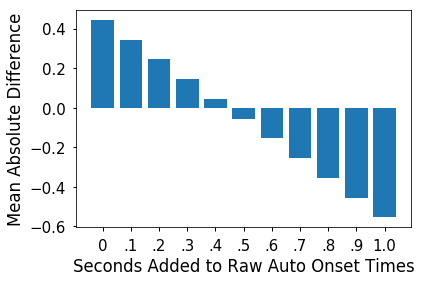

In [175]:
plt.bar(['0','.1','.2','.3','.4','.5','.6','.7','.8','.9','1.0'],means)
plt.ylabel('Mean Absolute Difference')
plt.xlabel('Seconds Added to Raw Auto Onset Times')

#plt.set_xticklabels(['0','.1','.2','.3','.4','.5','.6','.7','.8','.9','1'])

# Mean Absolute Difference - Onsets (Averaged within Subjects)


Mean: 0.4545s   Std Dev: 0.1363s

Max: 0.8038s   Min: 0.2662s


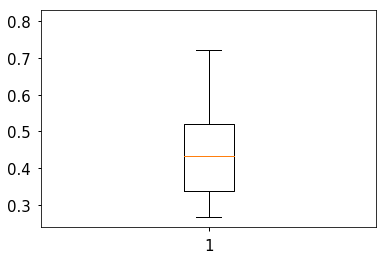

In [176]:
flat_subs = {'man':[] , 'auto':[]}
sub_means = []

for man,auto in zip(sub_onsets_man, sub_onsets_auto):
    flat_subs['man'].append([item*.001 for sublist in man for item in sublist])
    flat_subs['auto'].append([item for sublist in auto for item in sublist])

for a,b in zip(flat_subs['man'],flat_subs['auto']):
    sub_means.append(np.mean([abs(x-y) for x,y in zip(a,b)]))
    
    
#print flat_subs['man']
print
print 'Mean: ' + str(np.mean(sub_means))[0:6] + 's'+ '   Std Dev: ' + str(np.std(sub_means))[0:6]+'s'
print
print 'Max: ' + str(max(sub_means))[0:6] +'s'+ '   Min: ' + str(min(sub_means))[0:6]+'s'

#plt.ylim(ymin=-.1, ymax=1.3)
fig = plt.boxplot(sub_means, showfliers=True)


# Onset Correlation - By List

<a list of 99 Patch objects>

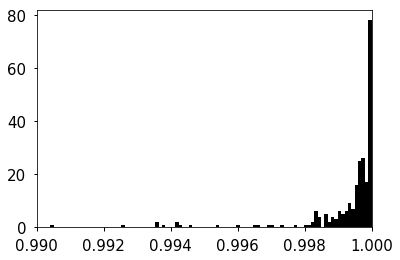

In [177]:
plt.xlim(.990, 1)

plt.hist(list_corrs_only, color='black', range=[.90, 1.00], bins=list(np.linspace(.99,1.00,100)))[2]


# Onset Correlation - By Word

<a list of 99 Patch objects>

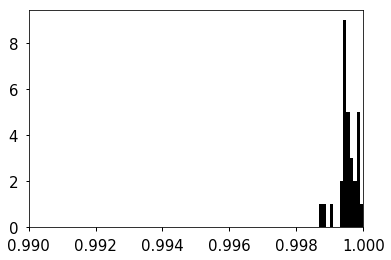

In [178]:
plt.xlim(.990, 1)
g = np.linspace(.99,1.00,100)

plt.hist(sub_corrs_only, color='black', range=[.90, 1.00], bins=list(g))[2]

(0.9995090337164165, 0.0)


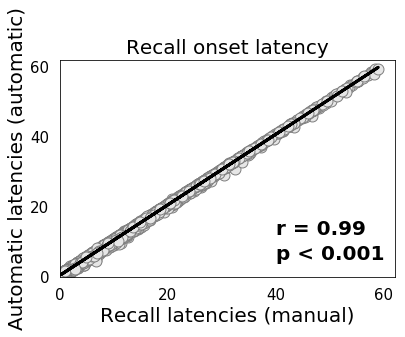

In [179]:
fig = plt.figure(2)
ax = fig.add_subplot(111)#, axisbg='white')
ax.scatter(x_onsets, y_onsets, facecolor='.9', linewidth=1, color='gray', s=120)#, linewidth=2.0)
plt.grid(False)

plt.axis([0, 62, 0, 62])
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Recall latencies (manual)', fontsize=20)
plt.ylabel('Automatic latencies (automatic)', fontsize=20)

reg_line = np.polyfit(x_onsets, y_onsets, 1)
plt.plot(x_onsets, np.poly1d(reg_line)(x_onsets), color='black', linewidth=3.0)

from scipy.stats import pearsonr
r = pearsonr(x_onsets, y_onsets)

plt.title('Recall onset latency', fontsize=20)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
plt.text(40, 12, 'r = ' + str(0.99), fontsize=20, fontweight='bold')
plt.text(40, 5, 'p < ' + str(0.001), fontsize=20, fontweight='bold')

print r

In [180]:
x_onsets

[0.8077551020408164,
 3.1751700680272115,
 5.387052154195011,
 7.843537414965986,
 10.613287981859413,
 13.088707482993195,
 15.822108843537418,
 20.342312925170067,
 24.593560090702947,
 28.598344671201815,
 31.33673469387755,
 1.727324263038549,
 4.441768707482994,
 7.046122448979592,
 11.225850340136054,
 14.661723356009071,
 17.89687074829932,
 20.992108843537412,
 24.144467120181407,
 28.00453514739229,
 33.7507029478458,
 44.92122448979592,
 1.724126984126984,
 3.3621995464852614,
 6.222675736961452,
 9.68984126984127,
 13.224104308390025,
 16.522312925170066,
 1.3555782312925169,
 3.3234240362811795,
 6.387301587301589,
 9.118140589569162,
 16.516780045351474,
 19.377256235827662,
 29.82251700680272,
 1.3698185941043084,
 3.4073242630385496,
 6.1170748299319735,
 8.82997732426304,
 11.38034013605442,
 14.501337868480725,
 17.73517006802721,
 1.1480272108843534,
 3.959501133786848,
 6.96172335600907,
 9.480430839002269,
 11.981609977324263,
 14.861746031746033,
 17.72122448979592

In [181]:
y_onsets

[1.5,
 3.9,
 6.1,
 8.6,
 11.4,
 13.8,
 16.6,
 21.1,
 25.1,
 29.4,
 32.5,
 1.8,
 5.2,
 8.2,
 12.0,
 15.4,
 18.6,
 21.7,
 25.0,
 28.7,
 34.5,
 45.7,
 1.7,
 3.3,
 7.0,
 10.6,
 14.0,
 17.2,
 2.1,
 4.1,
 7.0,
 9.8,
 17.3,
 20.1,
 30.6,
 2.1,
 4.2,
 6.8,
 9.6,
 12.1,
 15.2,
 18.5,
 1.9,
 4.7,
 7.7,
 10.2,
 12.7,
 15.6,
 18.5,
 26.6,
 1.4,
 4.4,
 7.0,
 9.5,
 12.1,
 15.6,
 18.3,
 21.4,
 24.8,
 29.5,
 49.8,
 2.0,
 4.1,
 6.0,
 8.8,
 11.5,
 14.8,
 29.9,
 38.2,
 1.4,
 3.4,
 5.7,
 8.1,
 10.1,
 12.4,
 14.3,
 16.2,
 18.0,
 20.3,
 22.2,
 24.4,
 26.2,
 1.8,
 5.1,
 7.0,
 9.1,
 10.1,
 12.9,
 14.7,
 16.7,
 17.6,
 21.1,
 22.0,
 30.8,
 31.8,
 1.9,
 2.9,
 4.4,
 7.1,
 9.0,
 10.2,
 12.9,
 15.0,
 16.9,
 18.9,
 20.8,
 25.7,
 2.0,
 4.2,
 5.8,
 12.5,
 14.5,
 16.7,
 21.2,
 23.7,
 24.6,
 27.4,
 29.3,
 31.2,
 32.1,
 1.9,
 4.2,
 6.6,
 11.2,
 13.3,
 15.2,
 17.0,
 19.4,
 21.4,
 24.8,
 26.7,
 29.0,
 31.1,
 33.0,
 33.8,
 1.9,
 3.8,
 6.5,
 9.0,
 11.2,
 13.4,
 15.5,
 17.9,
 21.0,
 23.3,
 25.4,
 27.7,
 41.6,
 43.0,
 45.8,
 5

In [182]:
counter=0
for x,y in zip(x_onsets,y_onsets):
    if x>y:
        counter += 1
    

In [183]:
counter

303

In [184]:
counter2=0
for x,y in zip(x_onsets,y_onsets):
    if x>y+2:
        counter2 += 1

In [185]:
counter2

1

In [186]:
len(x_onsets)

2412

In [187]:
percent = []
for a in [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]:
    counter = 0
    for x,y in zip(x_onsets,shifted_y[0]):
        if x > y+a:
            counter += 1
    percent.append(float(counter)/len(x_onsets))

In [188]:
percent

[0.99212271973466,
 0.9734660033167496,
 0.892620232172471,
 0.3743781094527363,
 0.2752902155887231,
 0.25538971807628524,
 0.23383084577114427,
 0.21102819237147596,
 0.18407960199004975,
 0.1517412935323383,
 0.1256218905472637]

Text(0.5,0,'Min difference Man - Auto in Seconds')

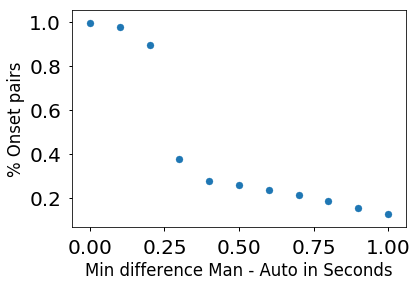

In [189]:
plt.scatter([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1],percent)
plt.ylabel('% Onset pairs')
plt.xlabel('Min difference Man - Auto in Seconds')

In [190]:
for onsets in [x_onsets, shifted_y[0]]:
    
    indices = []
    vals = []
    
    for a,b in enumerate(onsets):
        if b < x_onsets[a-1]:
            indices.append(a)
            vals.append(b)
    print(len(indices))
    
# NOTE: expected number is 8 * 30 ? 

240
240


In [191]:
len([x for y,x in enumerate(shifted_y[0]) if x < shifted_y[0][y-1]])  

240